## UNIVERSIDADE FEDERAL DE ALAGOAS
### Engenharia de Computação - 2022.2 
### Computação Gráfica e Processamento Digital de Imagens
#### Prof.: Tiago Vieira
#### Aluna: Letícia Gabriela Cena de Lima (18113063)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('_mpl-gallery')
from matplotlib import cm

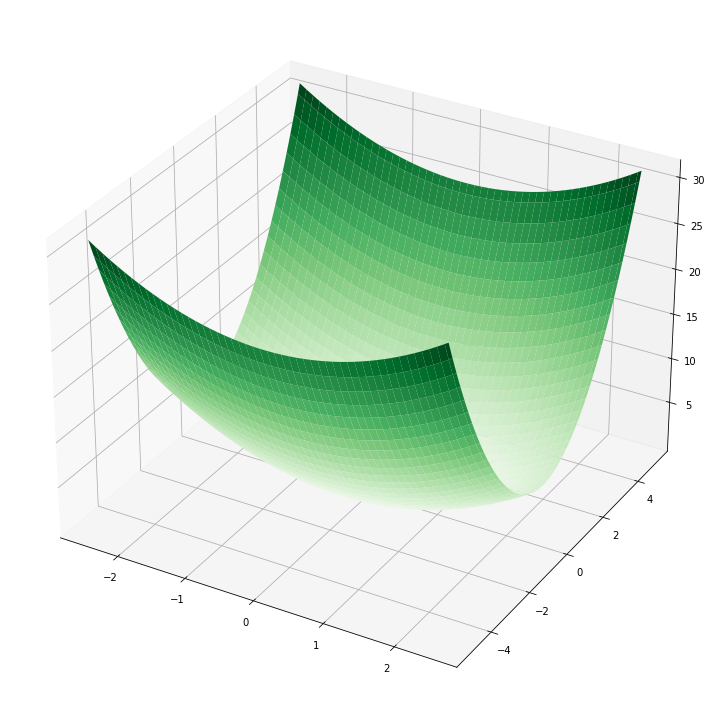

In [13]:
# (1) Create the image of a paraboloid with one axis scaled (like an oval paraboloid).
# Suggestion: Use numpy.linspace() and numpy.meshgrid() to generate the images.

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

X = X * 0.5
Z = X**2 + Y**2

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.Greens)
plt.show()

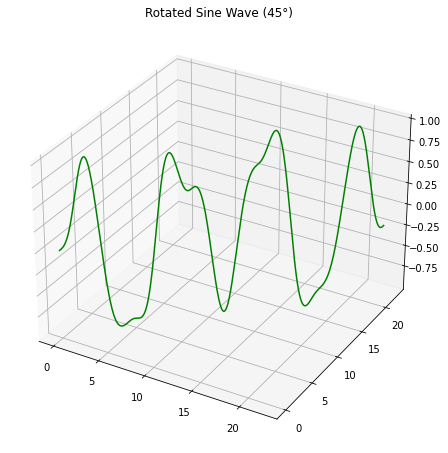

In [27]:
# (2) Create the image of a rotated sin using rotation of coordinates.

# Create the x and y data for the sine wave
x = np.linspace(0, 10*np.pi, 1000)
y = np.sin(x)

# Convert the rotation angle to radians
theta_rad = np.deg2rad(45)

# Define the rotation matrix
rotation_matrix = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                            [np.sin(theta_rad), np.cos(theta_rad)]])

# Rotate the coordinates of the sine wave
xy_rotated = np.dot(rotation_matrix, np.vstack([x, y]))

# Create the x, y, and z data for the rotated sine wave
X = xy_rotated[0,:]
Y = xy_rotated[1,:]
Z = np.sin(X)

# Create a 3D plot of the rotated sine wave
fig = plt.figure(figsize=(6,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Y, Z, 'g')
ax.set_title(f"Rotated Sine Wave ({45}°)")
plt.show()


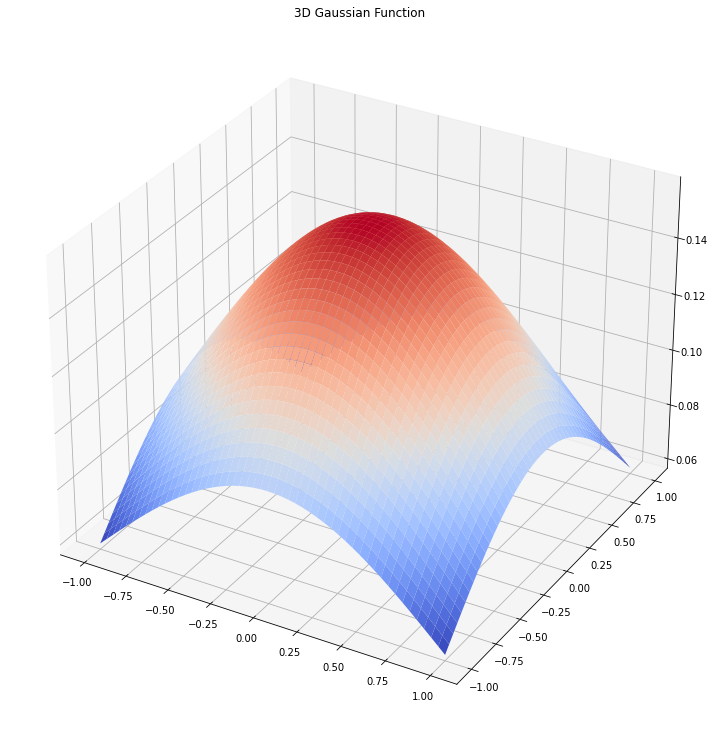

In [32]:
# (3) Create the image of a gaussian.

def gaussian_function(x, y, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2) - (y - mu)**2 / (2 * sigma**2)) / (2 * np.pi * sigma**2)

# Create the x, y, and z data for the Gaussian function
x = y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
Z = gaussian_function(X, Y, 0, 1)

# Create a 3D plot of the Gaussian function
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_title("3D Gaussian Function")
plt.show()


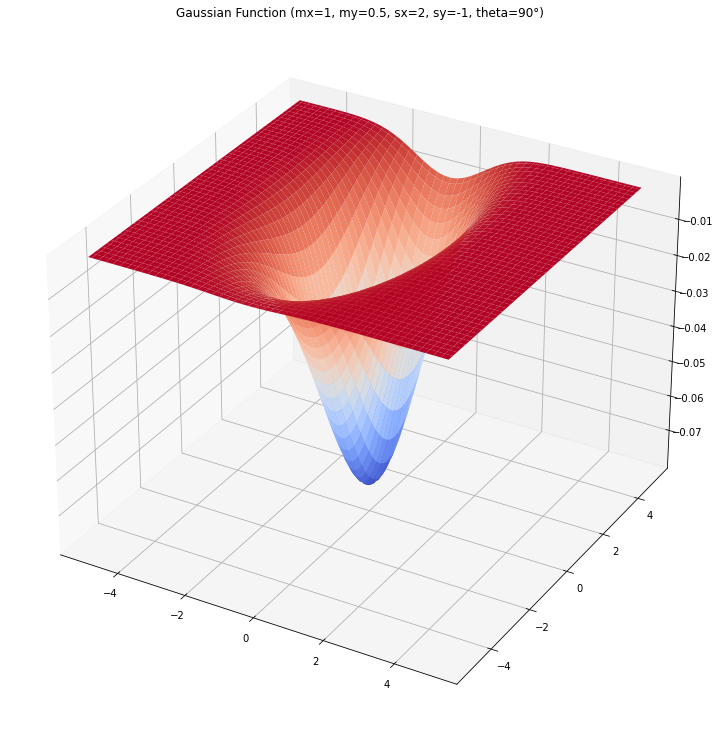

In [40]:
# (4) Create a function that generates the image of a Gaussian optionally 
# rotated by an angle \theta and with mx, my, sx, sy as input arguments.

def gaussian_function(x, y, mx, my, sx, sy):
    return np.exp(-(x - mx)**2 / (2 * sx**2) - (y - my)**2 / (2 * sy**2)) / (2 * np.pi * sx * sy)

mx = 1
my = 0.5
sx = 2
sy = -1
theta = 90

x = y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = gaussian_function(X, Y, mx, my, sx, sy)

if theta != 0: # rotate if theta is specified
  theta_rad = np.deg2rad(theta) # angle to rad

  rotation_matrix = np.array([[np.cos(theta_rad), -np.sin(theta_rad)], [np.sin(theta_rad), np.cos(theta_rad)]]) # rotation matrix

  # rotate the coords of the gaussian_function
  xy_rotated = np.dot(rotation_matrix, np.vstack([X.flatten(), Y.flatten()]))
  X = xy_rotated[0,:].reshape(X.shape)
  Y = xy_rotated[1,:].reshape(Y.shape)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_title(f"Gaussian Function (mx={mx}, my={my}, sx={sx}, sy={sy}, theta={theta}°)")
plt.show()